<p  style="z-index: 101;background: #fde073;text-align: center;line-height: 2.5;overflow: hidden;font-size:22px;">Please <a href="https://github.com/ECSIM/opem#cite" target="_blank">cite us</a> if you use the software</p>

#  Padulles-Hauer Dynamic Model

### Version 1.4

<ul>
    <li><a href="#Overview">Overview</a></li>
    <li><a href="#Nernst-Voltage">Nernst Voltage</a></li>
    <ul>
        <li><a href="#FC-Voltage">FC Voltage</a></li>
    </ul>
    <li><a href="#Power-of-PEMFC">Power of PEMFC</a></li>
    <li><a href="#Efficiency-of-PEMFC">Efficiency of PEMFC</a></li>
    <li><a href="#Linear-Approximation">Linear Approximation</a></li>
    <li><a href="#Overall-Parameters">Overall Parameters</a></li>
    <li><a href="#Full-Run">Full Run</a></li>
    <li><a href="#Plot">Plot</a></li>
    <li><a href="#Parameters">Parameters</a></li>
    <li><a href="#Reference">Reference</a></li>   
</ul>

## Overview

<p style="text-align:justify;">
The Padulles dynamic model can predict the transient response of cell voltage, temperature of the cell, hydrogen/oxygen out flow rates and cathode and anode channel temperatures/pressures under sudden change in load current. Hence, a dynamic fuel cell simulation is developed in this model, which incorporates the dynamics of flow and pressure in the anode and cathode channels and mass/ heat transfer transient features in the fuel cell body.
<br/>This model is based on several assumptions: 
<ol>    
<li>The stack is fed with hydrogen and air</li>   
<li>Cell temperature is stable at all times</li>   
<li>The ratio of pressures between the interior and exterior of the electrode channels is large</li>  
<li>The channels that transport gases along the electrodes have a fixed volume </li>    
<li>Only source of voltage loss is ohmic polarization</li>     
<li>Nernst equation can be applied too</li> 
</ol>
</p>

<p style="text-align:justify;">
Padulles-Hauer Dynamic Model is a dynamic electrochemical simulation model of a grid independent proton exchange membrane (PEM) fuel cell. This model includes a methanol reformer to generate hydrogen from methanol and the PEM stack. The model is used to predict the output voltage and power of a PEMFC. It has to be noted that the reformer model is a second order transfer function. 
</p>

<div style="text-align:center;">
    
<img src="images/Padulles-Hauer-Diagram.jpg" onerror='this.src="../images/Padulles-Hauer-Diagram.jpg"'>  
<p style="text-align:center;">Fig1. Padulles-Hauer Dynamic Model Block Diagram </p>
    
</div>

## Nernst Voltage

$$E_{Nernst}=N_0\times [E_0+\frac{RT}{2F}ln(\frac{P_{H_2}\times \sqrt{P_{O_2}}}{P_{H_2O}})]$$

$$P_{H_2}=\frac{\frac{1}{K_{H_2}}}{1+\tau_{H_2}^{(s)}}[(q_{H_2}^{(inlet)}-(2\times K_r \times i)]$$

$$\frac{q_{H_2}^{(inlet)}}{q_{methanol}}=\frac{CV}{\tau_{1}^{(s)}+(\tau_{2}^{(s)})^2+(\tau_{1}+\tau_{2})^{(s)}+1}$$

$$P_{O_2}=\frac{\frac{1}{K_{O_2}}}{1+\tau_{O_2}^{(s)}}[(q_{O_2}^{(inlet)}-(K_r \times i)]$$

$$P_{H_2O}=\frac{\frac{1}{K_{H_2O}}}{1+\tau_{H_2O}^{(s)}}[(q_{H_2O}^{(inlet)}-(2\times K_r \times i)]$$

$$K_r=\frac{N_0}{4F}$$

$$q_{O_2}^{(inlet)}=\frac{q_{H_2}^{(inlet)}}{r_{h-o}}$$

$$q_{H_2O}^{(inlet)}=q_{H_2}^{(inlet)}$$

In [1]:
from opem.Dynamic.Padulles_Hauer import qH2_Calc,Kr_Calc,qO2_Calc,PH2_Calc,PO2_Calc,PH2O_Calc,Enernst_Calc

In [2]:
qH2=qH2_Calc(qMethanol=0.0002,CV=2,t1=2,t2=2)
qH2

3.6363636363636364e-05

In [3]:
Kr=Kr_Calc(N0=5)
Kr

1.2955435375179044e-08

In [4]:
qO2=qO2_Calc(qH2=qH2,rho=1.168)
qO2

3.113325031133251e-05

In [5]:
PH2=PH2_Calc(KH2=0.0000422,tH2=3.37,Kr=Kr,I=1,qH2=qH2)
PH2

0.19704428889827239

In [6]:
PO2=PO2_Calc(KO2=0.0000211,tO2=6.74,Kr=Kr,I=1,qO2=qO2)
PO2

0.1905549730945132

In [7]:
PH2O=PH2O_Calc(KH2O=0.000007716,tH2O=18.418,Kr=Kr,I=1,qH2O=qH2)
PH2O

0.2425275190047356

In [8]:
Enernst=Enernst_Calc(E0=0.6,N0=5,T=343, PH2=PH2, PO2=PO2,PH2O=PH2O)
Enernst

2.9234016588243374

### FC Voltage

$$V_{Fuelcell}=E_{Nernst}-Bln(Ci)-(R^{int}\times i)$$

In [9]:
from opem.Dynamic.Padulles_Hauer import Vcell_Calc
FC_Voltage=Vcell_Calc(Enernst=Enernst, B=0.04777,C=0.0136,I=1,Rint=0.00303)
FC_Voltage

3.1256720945020287

## Power of PEMFC

$$P=V_{cell}\times i$$

$$P_{Thermal}=i\times(N \times E_{th}-V_{Stack})$$

$$E_{th}=\frac{-\Delta H}{nF}=1.23V$$

In [10]:
from opem.Dynamic.Padulles_Hauer import Power_Calc,Power_Thermal_Calc
Power=Power_Calc(Vcell=FC_Voltage,i=2)
Power

6.251344189004057

In [11]:
Power_Thermal_Calc(VStack=FC_Voltage,N=5,i=2)

6.048655810995943

## Efficiency of PEMFC

$$\eta=\frac{\mu_F\times V_{Fuelcell}}{N_0\times HHV}$$

In [12]:
from opem.Dynamic.Padulles_Hauer import Efficiency_Calc
Efficiency_Calc(Vcell=FC_Voltage,N=5)

0.40072719160282416

## Linear Approximation

Sometimes quick calculations regarding fuel cell efficiency–power-size relationships need to be made. Linear approximation is a good method to find a rough estimate of the value of polarization function at a particular point. A linear polarization curve has the following form:
$$V_{cell}=V_0-kI$$
where V0 is the intercept (actual open circuit voltage is always higher) and k is the slope of the curve.

* Notice : <a href="https://en.wikipedia.org/wiki/Simple_linear_regression">Simple linear regression</a> used for this approximation

<table style="text-align:center;">
    <tr>
        <td>$$Parameter$$</td>
        <td>$$Description$$</td>
        <td>$$Unit$$</td>
    </tr> 
    <tr>
        <td>$$V_0$$</td>
        <td style="text-align:center;">Intercept of the curve obtained by linear approximation</td>
        <td>$$V$$</td>
    </tr>
    <tr>
        <td>$$k$$</td>
        <td style="text-align:center;">Slope of the curve obtained by linear approximation</td>
        <td>$$A^{-1}$$</td>
    </tr>
    <tr>
        <td>$$P_{max}$$</td>
        <td style="text-align:center;">Maximum power obtained by linear approximation</td>
        <td>$$W$$</td>
    </tr>
    <tr>
        <td>$$V_{FC}|P_{max}$$</td>
        <td style="text-align:center;">Cell voltage at maximum power obtained by linear approximation</td>
        <td>$$V$$</td>
    </tr>
   
     
    
    
    
</table>

* Notice : These parameters are only available in HTML report

## Overall Parameters

<table style="text-align:center;">
    <tr>
        <td>$$Parameter$$</td>
        <td>$$Description$$</td>
        <td>$$Unit$$</td>
    </tr> 
    <tr>
        <td>$$\eta|P_{Max}$$</td>
        <td style="text-align:center;">Cell efficiency at maximum power</td>
        <td>$$--$$</td>
    </tr>
    <tr>
        <td>$$P_{Max}$$</td>
        <td style="text-align:center;">Maximum power </td>
        <td>$$W$$</td>
    </tr>
    <tr>
        <td>$$P_{Elec} $$</td>
        <td style="text-align:center;">Total electrical power </td>
        <td>$$W$$</td>
    </tr>
    <tr>
        <td>$$P_{Thermal} $$</td>
        <td style="text-align:center;">Total thermal power   </td>
        <td>$$W$$</td>
    </tr>
    <tr>
        <td>$$V_{FC}|P_{Max}$$</td>
        <td style="text-align:center;">Cell voltage at maximum power </td>
        <td>$$V$$</td>
    </tr>
   
     
    
    
    
</table>

* Notice : P(Thermal) & P(Elec) calculated by <a href="https://en.wikipedia.org/wiki/Simpson%27s_rule">Simpson's Rule</a>

* Notice : These parameters are only available in HTML report

## Full Run

* Run from `i`=0.1 to `i`=100 with `step`=0.1

In [13]:
Test_Vector = {
    "T": 343,
    "E0": 0.6,
    "N0": 5,
    "KO2": 0.0000211,
    "KH2": 0.0000422,
    "KH2O": 0.000007716,
    "tH2": 3.37,
    "tO2": 6.74,
    "t1": 2,
    "t2": 2,
    "tH2O": 18.418,
    "B": 0.04777,
    "C": 0.0136,
    "Rint": 0.00303,
    "rho": 1.168,
    "qMethanol": 0.0002,
    "CV": 2,
    "i-start": 0.1,
    "i-stop": 100,
    "i-step": 0.1,
    "Name": "Padulles_Hauer_Test"}


* Notice : "Name", new in version 0.5

In [14]:
from opem.Dynamic.Padulles_Hauer import Dynamic_Analysis
data=Dynamic_Analysis(InputMethod=Test_Vector,TestMode=True,PrintMode=True,ReportMode=True)

###########
Padulles-Hauer-Model Simulation
###########
Analyzing . . .
I : 0.1
E : 2.9234154992732004 V
FC Efficiency : 0.41518043908246366 
FC Power : 0.3238407424843217 W
FC Voltage : 3.2384074248432166 V
PH2 : 0.19717074233280188 atm
PH2O : 0.2426831613626925 atm
PO2 : 0.1906263686382979 atm
Power-Thermal : 0.2911592575156784 W
###########
I : 0.2
E : 2.9234139617015558 V
FC Efficiency : 0.4108963136482338 
FC Power : 0.6409982492912448 W
FC Voltage : 3.204991246456224 V
PH2 : 0.1971566919511875 atm
PH2O : 0.24266586776736396 atm
PO2 : 0.1906184358000996 atm
Power-Thermal : 0.5890017507087553 W
###########
I : 0.3
E : 2.9234124240659227 V
FC Efficiency : 0.4083740564879825 
FC Power : 0.955595292181879 W
FC Voltage : 3.1853176406062635 V
PH2 : 0.19714264156957312 atm
PH2O : 0.24264857417203542 atm
PO2 : 0.1906105029619013 atm
Power-Thermal : 0.889404707818121 W
###########
I : 0.4
E : 2.9234108863662946 V
FC Efficiency : 0.4065731449109761 
FC Power : 1.2685082121222457 W
FC Voltag

PH2 : 0.19452927058929687 atm
PH2O : 0.23943196544092632 atm
PO2 : 0.18913499505701667 atm
Power-Thermal : 60.843730956995536 W
###########
I : 19.0
E : 2.923123755463716 V
FC Efficiency : 0.37566645398802895 
FC Power : 55.673768481025895 W
FC Voltage : 2.930198341106626 V
PH2 : 0.1945152202076825 atm
PH2O : 0.23941467184559778 atm
PO2 : 0.1891270622188184 atm
Power-Thermal : 61.17623151897411 W
###########
I : 19.1
E : 2.9231222057027035 V
FC Efficiency : 0.37559526020704265 
FC Power : 55.95618186564522 W
FC Voltage : 2.9296430296149327 V
PH2 : 0.1945011698260681 atm
PH2O : 0.23939737825026924 atm
PO2 : 0.18911912938062006 atm
Power-Thermal : 61.5088181343548 W
###########
I : 19.2
E : 2.923120655876683 V
FC Efficiency : 0.3755242342980682 
FC Power : 56.2385093284787 W
FC Voltage : 2.9290890275249324 V
PH2 : 0.1944871194444537 atm
PH2O : 0.23938008465494068 atm
PO2 : 0.18911119654242173 atm
Power-Thermal : 61.8414906715213 W
###########
I : 19.3
E : 2.9231191059856494 V
FC Efficien

PH2 : 0.19242171334713862 atm
PH2O : 0.23683792614164476 atm
PO2 : 0.187945069327271 atm
Power-Thermal : 111.6272074618417 W
###########
I : 34.0
E : 2.922890561826411 V
FC Efficiency : 0.36624573785169073 
FC Power : 97.1283696782684 W
FC Voltage : 2.856716755243188 V
PH2 : 0.19240766296552422 atm
PH2O : 0.23682063254631622 atm
PO2 : 0.18793713648907268 atm
Power-Thermal : 111.97163032173162 W
###########
I : 34.1
E : 2.922889002252866 V
FC Efficiency : 0.36618870536962167 
FC Power : 97.39887185421198 W
FC Voltage : 2.856271901883049 V
PH2 : 0.19239361258390986 atm
PH2O : 0.23680333895098768 atm
PO2 : 0.1879292036508744 atm
Power-Thermal : 112.31612814578804 W
###########
I : 34.2
E : 2.9228874426134865 V
FC Efficiency : 0.3661317255479516 
FC Power : 97.66929910717158 W
FC Voltage : 2.8558274592740225 V
PH2 : 0.19237956220229546 atm
PH2O : 0.23678604535565914 atm
PO2 : 0.18792127081267607 atm
Power-Thermal : 112.66070089282846 W
###########
I : 34.3
E : 2.9228858829082673 V
FC Effic

PO2 : 0.1863981658786016 atm
Power-Thermal : 180.16811929585796 W
###########
I : 53.5
E : 2.9225851929323965 V
FC Efficiency : 0.3558552866670757 
FC Power : 148.4984111261707 W
FC Voltage : 2.7756712360031908 V
PH2 : 0.18966783855071853 atm
PH2O : 0.23344838145725025 atm
PO2 : 0.1863902330404033 atm
Power-Thermal : 180.52658887382933 W
###########
I : 53.6
E : 2.9225836204152484 V
FC Efficiency : 0.35580480219370675 
FC Power : 148.75487170114494 W
FC Voltage : 2.7752774571109127 V
PH2 : 0.18965378816910414 atm
PH2O : 0.2334310878619217 atm
PO2 : 0.186382300202205 atm
Power-Thermal : 180.8851282988551 W
###########
I : 53.7
E : 2.9225820478311695 V
FC Efficiency : 0.35575433902903814 
FC Power : 149.01126244570293 W
FC Voltage : 2.7748838444264976 V
PH2 : 0.18963973778748974 atm
PH2O : 0.23341379426659314 atm
PO2 : 0.1863743673640067 atm
Power-Thermal : 181.2437375542971 W
###########
I : 53.8
E : 2.922580475180153 V
FC Efficiency : 0.35570389709374883 
FC Power : 149.26758337642076 

FC Voltage : 2.716681683411401 V
PH2 : 0.1875040797821027 atm
PH2O : 0.23078516777665453 atm
PO2 : 0.1851685759578644 atm
Power-Thermal : 236.5556320129545 W
###########
I : 69.0
E : 2.9223406504655927 V
FC Efficiency : 0.34824459210495795 
FC Power : 187.42523947088839 W
FC Voltage : 2.7163078184186724 V
PH2 : 0.18749002940048834 atm
PH2O : 0.230767874181326 atm
PO2 : 0.1851606431196661 atm
Power-Thermal : 236.92476052911164 W
###########
I : 69.1
E : 2.9223390675056606 V
FC Efficiency : 0.34819667355055073 
FC Power : 187.67104311027583 W
FC Voltage : 2.715934053694296 V
PH2 : 0.18747597901887395 atm
PH2O : 0.23075058058599743 atm
PO2 : 0.1851527102814678 atm
Power-Thermal : 237.29395688972414 W
###########
I : 69.2
E : 2.9223374844779046 V
FC Efficiency : 0.3481487678138545 
FC Power : 187.91677891520612 W
FC Voltage : 2.7155603889480653 V
PH2 : 0.18746192863725955 atm
PH2O : 0.2307332869906689 atm
PO2 : 0.1851447774432695 atm
Power-Thermal : 237.66322108479392 W
###########
I : 69.

FC Power : 223.30691929529362 W
FC Voltage : 2.6615842585851444 V
PH2 : 0.18539652253994446 atm
PH2O : 0.22819112847737297 atm
PO2 : 0.1839786502281187 atm
Power-Thermal : 292.6780807047064 W
###########
I : 84.0
E : 2.922102445332999 V
FC Efficiency : 0.34118240545255707 
FC Power : 223.5427120525154 W
FC Voltage : 2.6612227625299454 V
PH2 : 0.1853824721583301 atm
PH2O : 0.22817383488204449 atm
PO2 : 0.18397071738992044 atm
Power-Thermal : 293.0572879474846 W
###########
I : 84.1
E : 2.9221008521342346 V
FC Efficiency : 0.3411360684753005 
FC Power : 223.77843819842758 W
FC Voltage : 2.6608613341073437 V
PH2 : 0.18536842177671567 atm
PH2O : 0.2281565412867159 atm
PO2 : 0.1839627845517221 atm
Power-Thermal : 293.4365618015724 W
###########
I : 84.2
E : 2.922099258866766 V
FC Efficiency : 0.3410897401482598 
FC Power : 224.01409773977113 W
FC Voltage : 2.6604999731564267 V
PH2 : 0.1853543713951013 atm
PH2O : 0.22813924769138735 atm
PO2 : 0.1839548517135238 atm
Power-Thermal : 293.815902

FC Power : 257.9348726837028 W
FC Voltage : 2.6080371353256093 V
PH2 : 0.18328896529778624 atm
PH2O : 0.22559708917809146 atm
PO2 : 0.18278872449837305 atm
Power-Thermal : 350.3001273162973 W
###########
I : 99.0
E : 2.921862694475892 V
FC Efficiency : 0.33431849421957094 
FC Power : 258.1607412363527 W
FC Voltage : 2.6076842549126535 V
PH2 : 0.18327491491617184 atm
PH2O : 0.22557979558276292 atm
PO2 : 0.18278079166017475 atm
Power-Thermal : 350.68925876364733 W
###########
I : 99.1
E : 2.9218610909049794 V
FC Efficiency : 0.3342732593807759 
FC Power : 258.38654403615215 W
FC Voltage : 2.607331423170052 V
PH2 : 0.18326086453455745 atm
PH2O : 0.22556250198743438 atm
PO2 : 0.18277285882197644 atm
Power-Thermal : 351.07845596384783 W
###########
I : 99.2
E : 2.9218594872644665 V
FC Efficiency : 0.3342280307691647 
FC Power : 258.6122810879489 W
FC Voltage : 2.6069786399994848 V
PH2 : 0.18324681415294305 atm
PH2O : 0.22554520839210584 atm
PO2 : 0.18276492598377814 atm
Power-Thermal : 351.

* Notice : "Status", "V0", "K" and "EFF" , new in version 0.8

In [15]:
data_2=Dynamic_Analysis(InputMethod=Test_Vector,TestMode=True,PrintMode=True,ReportMode=False)

###########
Padulles-Hauer-Model Simulation
###########
Analyzing . . .
Done!


In [16]:
Dynamic_Analysis(InputMethod={},TestMode=True,PrintMode=False,ReportMode=True)

{'Message': '[Error] Padulles-Hauer Simulation Failed!(Check Your Inputs)',
 'Status': False}

### Parameters

1. `TestMode` : Active test mode and get/return data as `dict`, (Default : `False`)
2. `ReportMode` : Generate reports(`.csv`,`.opem`,`.html`) and print result in console, (Default : `True`)
3. `PrintMode` : Control printing in console, (Default : `True`)
4. `Folder` : Reports folder, (Default : `os.getcwd()`)

* Notice : "PrintMode" & "ReportMode" , new in version 0.5

* Notice : "Folder" , new in version 1.4

## Plot

In [17]:
import sys
!{sys.executable} -m pip -q -q install matplotlib;
import matplotlib.pyplot as plt

In [18]:
def plot_func(x,y,x_label,y_label,color='green',legend=[],multi=False):
    plt.figure()
    plt.grid()
    if multi==True:
        for index,y_item in enumerate(y):
            plt.plot(x,y_item,color=color[index])
    else:
        plt.plot(x,y,color=color)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if len(legend)!=0:
        plt.legend(legend)
    plt.show()


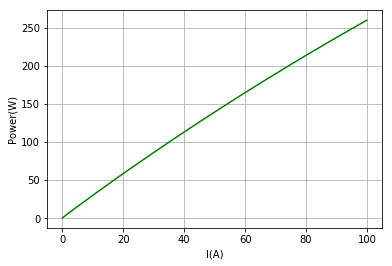

In [19]:
plot_func(data["I"],data["P"],"I(A)","Power(W)")

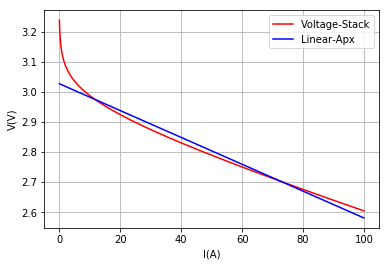

In [20]:
plot_func(data["I"],[data["V"],data["VE"]],"I(A)","V(V)",["red","blue"],legend=["Voltage-Stack","Linear-Apx"],multi=True)

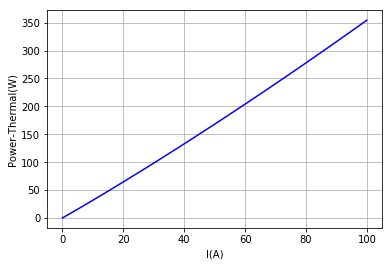

In [21]:
plot_func(data["I"],data["Ph"],"I(A)","Power-Thermal(W)","blue")

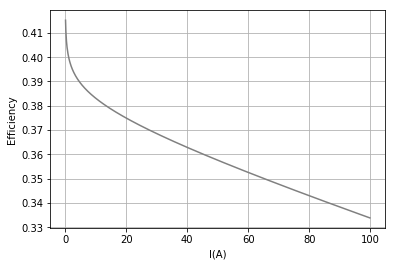

In [22]:
plot_func(data["I"],data["EFF"],"I(A)","Efficiency","gray")

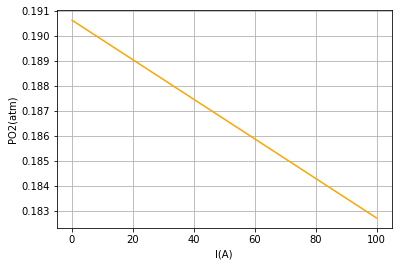

In [23]:
plot_func(data["I"],data["PO2"],"I(A)","PO2(atm)","orange")

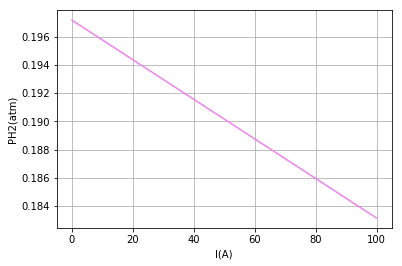

In [24]:
plot_func(data["I"],data["PH2"],"I(A)","PH2(atm)","violet")

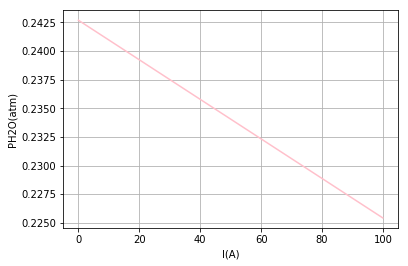

In [25]:
plot_func(data["I"],data["PH2O"],"I(A)","PH2O(atm)","pink")

<a href="Padulles-Hauer/Padulles_Hauer_Test.html">HTML File</a>

<a href="Padulles-Hauer/Padulles_Hauer_Test.opem">OPEM File</a>

<a href="Padulles-Hauer/Padulles_Hauer_Test.csv">CSV File</a>

## Parameters

Inputs, Constants & Middle Values
1. User : User input
2. System : Simulator calculation (middle value)

<table style="text-align:center;">
    <tr>
        <td>$$Parameter$$</td>
        <td>$$Description$$</td>
        <td>$$Unit$$</td>
        <td>$$Value$$</td>
    </tr>
     <tr>
        <td>$$T$$</td>
        <td style="text-align:center;">Fuel cell temperature</td>
        <td>$$K$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$N_0$$</td>
        <td style="text-align:center;">Number of cells</td>
        <td>$$--$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$E_0$$</td>
        <td style="text-align:center;">No load voltage</td>
        <td>$$V$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$K_{H_2}$$</td>
        <td style="text-align:center;">Hydrogen valve constant</td>
        <td>$$kmol.s^{-1}.atm^{-1}$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$K_{H_2O}$$</td>
        <td style="text-align:center;">Water valve constant</td>
        <td>$$kmol.s^{-1}.atm^{-1}$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$K_{O_2}$$</td>
        <td style="text-align:center;">Oxygen valve constant</td>
        <td>$$kmol.s^{-1}.atm^{-1}$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$\tau_{H_2}^{(s)}$$</td>
        <td style="text-align:center;">Hydrogen time constant</td>
        <td>$$s$$</td>
        <td>$$User$$</td>
    </tr>
     <tr>
        <td>$$\tau_{H_2O}^{(s)}$$</td>
        <td style="text-align:center;">Water time constant</td>
        <td>$$s$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$\tau_{O_2}^{(s)}$$</td>
        <td style="text-align:center;">Oxygen time constant</td>
        <td>$$s$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$\tau_{1}^{(s)}$$</td>
        <td style="text-align:center;">Reformer time constant</td>
        <td>$$s$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$\tau_{2}^{(s)}$$</td>
        <td style="text-align:center;">Reformer time constant</td>
        <td>$$s$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$CV$$</td>
        <td style="text-align:center;">Conversion factor</td>
        <td>$$--$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$B$$</td>
        <td style="text-align:center;">Activation voltage constant</td>
        <td>$$V$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$C$$</td>
        <td style="text-align:center;">Activation constant parameter</td>
        <td>$$A^{-1}$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$R^{int}$$</td>
        <td style="text-align:center;">Fuel cell internal resistance</td>
        <td>$$\Omega$$</td>
        <td>$$User$$</td>
    </tr>
      <tr>
        <td>$$r_{h-o}$$</td>
        <td style="text-align:center;">Hydrogen-Oxygen flow ratio</td>
        <td>$$--$$</td>
        <td>$$User$$</td>
    </tr>
       <tr>
        <td>$$q_{methanol}$$</td>
        <td style="text-align:center;">Molar flow of methanol</td>
        <td>$$kmol.s^{-1}$$</td>
        <td>$$User$$</td>
     <tr>
        <td>$$i_{start}$$</td>
        <td style="text-align:center;">Cell operating current start point</td>
        <td>$$A$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$i_{step}$$</td>
        <td style="text-align:center;">Cell operating current step</td>
        <td>$$A$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$i_{stop}$$</td>
        <td style="text-align:center;">Cell operating current end point</td>
        <td>$$A$$</td>
        <td>$$User$$</td>
    </tr>
     <tr>
        <td>$$P_{H_2}$$</td>
        <td style="text-align:center;">Hydrogen partial pressure</td>
        <td>$$atm$$</td>
        <td>$$System$$</td>
    </tr>
     <tr>
        <td>$$P_{H_2O}$$</td>
        <td style="text-align:center;">Water partial pressure</td>
        <td>$$atm$$</td>
        <td>$$System$$</td>
    </tr>
     <tr>
        <td>$$P_{O_2}$$</td>
        <td style="text-align:center;">Oxygen partial pressure</td>
        <td>$$atm$$</td>
        <td>$$System$$</td>
    </tr>
     <tr>
        <td>$$K_r$$</td>
        <td style="text-align:center;">Modeling constant</td>
        <td>$$kmol.s^{-1}.A^{-1}$$</td>
        <td>$$System$$</td>
    </tr>
      <tr>
        <td>$$q_{O_2}^{(inlet)}$$</td>
        <td style="text-align:center;">Molar flow of oxygen</td>
        <td>$$kmol.s^{-1}$$</td>
        <td>$$System$$</td>
    </tr>
     <tr>
        <td>$$q_{H_2O}^{(inlet)}$$</td>
        <td style="text-align:center;">Molar flow of water</td>
        <td>$$kmol.s^{-1}$$</td>
        <td>$$System$$</td>
    </tr>
    <tr>
        <td>$$q_{H_2}^{(inlet)}$$</td>
        <td style="text-align:center;">Molar flow of hydrogen</td>
        <td>$$kmol.s^{-1}$$</td>
        <td>$$System$$</td>
    </tr>
               <tr>
        <td>$$\mu_F$$</td>
        <td style="text-align:center;">The fuel utilization</td>
        <td>$$--$$</td>
        <td>$$0.95$$</td>
    </tr>
          <tr>
    <td>$$HHV$$</td>
        <td style="text-align:center;">Higher heating value potential</td>
        <td>$$V$$</td>
        <td>$$1.482$$</td>
    </tr>
             <tr>
    <td>$$R$$</td>
        <td style="text-align:center;">Universal gas constant</td>
        <td>$$J.kmol^{-1}.K^{-1}$$</td>
        <td>$$8314.47$$</td>
    </tr>
             <tr>
    <td>$$F$$</td>
        <td style="text-align:center;">Faraday’s constant</td>
        <td>$$C.kmol^{-1}$$</td>
        <td>$$96484600$$</td>
    </tr>
    <tr>
    <td>$$E_{th}$$</td>
        <td style="text-align:center;">Theoretical potential</td>
        <td>$$V$$</td>
        <td>$$1.23$$</td>
    </tr>
    
    
    
</table>

* Notice : $$q_{H_2}=q_{H_2O}$$

## Reference
<blockquote>
1- J. Padulles, G.W. Ault, J.R. McDonald. 2000. "An integrated SOFC plant dynamic model for power systems
simulation." Journal of Power Sources (Elsevier) 86 (1-2): 495-500. doi:10.1016/S0378-7753(99)00430-9
</blockquote>
<blockquote>
2- Hauer, K.-H. 2001. "Analysis tool for fuel cell vehicle hardware and software (controls) with an application
to fuel economy comparisons of alternative system designs." Ph.D. dissertation, Transportation Technology
and Policy, University of California Davis.
</blockquote>